In this task we have to predict the percentage of marks of a student for the given hours of study. A simple linear regression model is used to find the relationship between studying hours and percentage of marks. The task is implemented using Python. First we import necessary libraries to perform the task

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('score.csv')

In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Exploratory Data Analysis**


Let us check for the missing values in the dataset

In [ ]:
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

We do not have any missing values in the dataset.

Let us visualize the distribution of the dataset. Let us also look for outliers if exists.

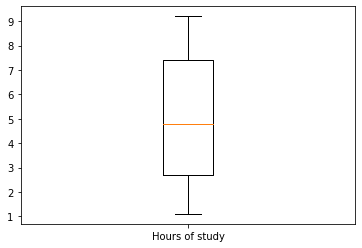

In [ ]:
plt.boxplot(dataset['Hours'])
plt.xticks([1],labels=['Hours of study'])
plt.show()

In [ ]:
np.quantile(dataset['Hours'],[0.25,0.5,0.75,1])

array([2.7, 4.8, 7.4, 9.2])

We can see that the distribution is slightly positively skewed. There exists no significant outliers in the dataset.

25 % of the students have studied upto 2.7 hours. 50% of the students have studies around 4.8 hours. 75% of the students have studied upto 7.4 hours. The maximum a student has studied is 9.2 hours.




Before fitting the data into the model , we will check the relationship between the hours of study and percentage of marks scored.


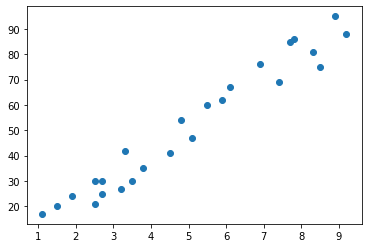

In [ ]:

plt.scatter(dataset['Hours'],dataset['Scores'])
plt.show()


We can see that there exists a positive correlation between hours of study and percentage of marks scored. Hence this feature is significant in predicting the percentage of marks. 


**Model fitting**

**Data Spilt**

Before we fit the model, we will seggregate the dataset into training and test data. We have taken 80% of the data for training and 20% for testing. The model expects a 2D array as the input hence, the data is reshaped to a 2D arrray. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Hours'], dataset['Scores'], test_size=0.2, random_state =  42)

train_x = X_train.values.reshape(-1,1)
train_y = y_train.values.reshape(-1,1)


test_x = X_test.values.reshape(-1,1)
test_y = y_test.values.reshape(-1,1)

The model is fitted below and the performance is predicted using test set. Mean squared error and adjusted R squared is used as the metric for measuring the performance of the model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Defining a function to plot the regression fit for a given dataset


In [ ]:
def plot_fit(x,y,predicted,msg='test'):
  plt.scatter(x, y,  color='black',label='Observed data')
  plt.plot(x, predicted, color='blue', linewidth=3,label='Predicted data')
  plt.title('Linear Regression Results on the {} data'.format(msg))
  plt.xlabel('Hours')
  plt.ylabel('Scores')
  plt.legend()
  plt.show()

In [ ]:
pred_train = model.predict(train_x)

Visualizing the regression fit on the training data

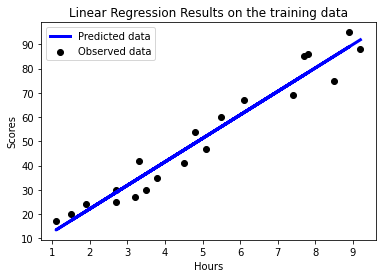

In [ ]:
plot_fit(train_x,train_y,pred_train,'training')

**Model testing**

Let us predict the percentage of scores in the test data to measure the performance of the model

In [ ]:
prediction = model.predict(test_x)

In [ ]:
print('Mean squared error value: %.2f'
      % mean_squared_error(test_y, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Adjusted R squared value: %.2f'
      % r2_score(test_y, prediction))


Mean squared error value: 18.94
Adjusted R squared value: 0.97


We can see that the adjusted R square value is close to 1. Hence the trained model has captured the relationship between hours of study and percentage of marks well.

We will now visualize the predicted scores against the actual scores in the test set


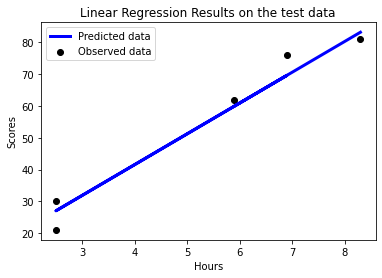

In [ ]:
plot_fit(test_x,test_y,prediction)

**Estimate percentage score**

The percentage score of a student is estimated below for the given hours of study


In [ ]:
sample_data = pd.Series([9.25])
sample_data = sample_data.values.reshape(-1,1)

In [ ]:
predicted_score = model.predict(sample_data)
predicted_score = predicted_score.reshape(1)

In [ ]:
print("The predicted score is {}".format(predicted_score[0]))

The predicted score is 92.38611528261494


**The predicted score is 92.38%**